# 🧠 Post-Pandemic Remote Work & Health Impact (2025)

| Sütun Adı                   | Açıklama                                                                              |
| --------------------------- | ------------------------------------------------------------------------------------- |
| **Survey_Date**             | Anketin uygulandığı tarih (YYYY-MM-DD formatında).                                    |
| **Age**                     | Katılımcının yaşı.                                                                    |
| **Gender**                  | Katılımcının cinsiyeti (ör. Male, Female, Non-binary vb.).                            |
| **Region**                  | Katılımcının bulunduğu bölge veya kıta (ör. Asia, Europe, North America).             |
| **Industry**                | Katılımcının çalıştığı sektör (ör. Education, Manufacturing, Professional Services).  |
| **Job_Role**                | Katılımcının iş pozisyonu veya unvanı (ör. Data Analyst, DevOps Engineer).            |
| **Work_Arrangement**        | Çalışma düzeni (ör. Remote, Onsite, Hybrid).                                          |
| **Hours_Per_Week**          | Haftalık ortalama çalışma saati.                                                      |
| **Mental_Health_Status**    | Katılımcının belirttiği zihinsel sağlık durumu (ör. Depression, Anxiety, ADHD, None). |
| **Burnout_Level**           | Katılımcının tükenmişlik düzeyi (ör. Low, Medium, High).                              |
| **Work_Life_Balance_Score** | İş-yaşam dengesi puanı (genellikle 1–5 arası, 5 = en dengeli).                        |
| **Physical_Health_Issues**  | Katılımcının yaşadığı fiziksel sağlık sorunları (ör. Back Pain, Eye Strain; None).    |
| **Social_Isolation_Score**  | Sosyal izolasyon düzeyi (muhtemelen 1–5 arası, yüksek değer = daha fazla izolasyon).  |
| **Salary_Range**            | Katılımcının maaş aralığı (ör. $40K–60K, $80K–100K).                                  |


## Veri Temizleme, Keşifsel Veri Analizi

---

### 📍 1. Giriş
Bu çalışma, pandemi sonrası dönemde uzaktan çalışmanın sağlık üzerindeki etkilerini anlamaya yöneliktir. Amaç, verideki kalıpları keşfetmek, aykırı değerleri (outlier) ve eksik verileri (missing values) uygun şekilde ele almak, ardından görselleştirmelerle ilişkileri analiz etmektir.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




### 📂 2. Veriyi Tanıma

**Adımlar:**
- Veri setini pandas ile içe aktar.
- İlk 5–10 satırı görüntüle.
- Satır ve sütun sayısını belirle.
- Değişken tiplerini incele.
- Her sütunun kısa açıklamasını oluştur.

In [76]:
# Veri setini pandas ile içe aktar.
df = pd.read_csv('/Users/sulgunatayeva/Desktop/1.modul, son proje/project1/post_pandemic_remote_work_health_impact_2025.csv')

In [77]:
# İlk 5–10 satırı görüntüle.
df.head(10)

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K
5,2025-06-01,52,Male,Oceania,Customer Service,Business Analyst,Onsite,61,Burnout,Medium,4,Back Pain; Shoulder Pain,3,$60K-80K
6,2025-06-01,50,Female,Asia,Manufacturing,IT Support,Onsite,62,NaN,Medium,4,Back Pain; Shoulder Pain; Wrist Pain,2,$80K-100K
7,2025-06-01,63,Non-binary,Europe,Professional Services,Technical Writer,Onsite,55,Anxiety,High,3,NaN,2,$100K-120K
8,2025-06-01,30,Female,South America,Technology,Software Engineer,Remote,47,Anxiety,Medium,2,Neck Pain,4,$60K-80K
9,2025-06-01,37,Female,Asia,Finance,HR Manager,Onsite,55,Burnout,Medium,5,Back Pain,1,$60K-80K


In [78]:
# Satır ve sütun sayısını belirle.
# 1.Veri setinde kaç gözlem ve kaç özellik var?
df.shape

(3157, 14)

In [79]:
df.describe()

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
count,3157.000000,3157.000000,3157.000000,3157.000000
mean,43.732024,49.904973,2.996516,2.704783
std,12.661095,8.897699,1.163307,1.188887
min,22.000000,35.000000,1.000000,1.000000
25%,33.000000,42.000000,2.000000,2.000000
50%,44.000000,50.000000,3.000000,3.000000
75%,55.000000,57.000000,4.000000,4.000000
max,65.000000,65.000000,5.000000,5.000000


In [80]:
# Değişken tiplerini incele.
df.dtypes

Survey_Date                object
Age                         int64
Gender                     object
Region                     object
Industry                   object
Job_Role                   object
Work_Arrangement           object
Hours_Per_Week              int64
Mental_Health_Status       object
Burnout_Level              object
Work_Life_Balance_Score     int64
Physical_Health_Issues     object
Social_Isolation_Score      int64
Salary_Range               object
dtype: object

In [81]:
# 2. Sayısal ve kategorik sütunların oranı nedir?
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

num_ratio = len(num_cols) / df.shape[1]
cat_ratio = len(cat_cols) / df.shape[1]

print(f"Sayısal sütun oranı: {num_ratio:.2f}")
print(f"Kategorik sütun oranı: {cat_ratio:.2f}")

Sayısal sütun oranı: 0.29
Kategorik sütun oranı: 0.71


In [82]:
#3. Tarih veya zaman bilgisi içeren değişken var mı?
df.select_dtypes(include=['datetime64']).columns
# Suan oyle 1 sutun yok

Index([], dtype='object')

In [83]:
df['Age'].min(), df['Age'].max()


(22, 65)

In [84]:
df['Hours_Per_Week'].min(), df['Hours_Per_Week'].max()

(35, 65)

### - Her sütunun kısa açıklamasını oluştur.

- 'Survey_Date' anket gunu 2025.06.01 de basliyor ve 2025.06.26 da bitiyor

- 'Age' - katilimcilarin yaslari 22-65 arasindadir

- 'Gender' - Katilimcilarin cinsiyeti 

- 'Region' -  Katilimcilarin katildigi bolgeler

- 'Industry' - Katilimcilarin calistigi sektor

- 'Job_Role' -  Katilimcilarin is unvani

- 'Work_Arrangement' - Katilimcilarin calisma sekilleri (hibrit, uzaktan veya is yerinde)

- 'Hours_Per_Week' - Calisma Saatleri 35(min) - 65(max)saat arasidir

- 'Mental_Health_Status' - Mental Saglik Problemleri

- 'Burnout_Level' - Tukenmislik Duzeyi

- 'Work_Life_Balance_Score' - Is Yasam Dengesi

- 'Physical_Health_Issues' - Fiziken Saglik Durumu

- 'Social_Isolation_Score' - Sosyal Izolasyon Durumu

- 'Salary_Range' - Maas Araligi

### 🧹 3. Eksik Verilerle (Missing Values) Mücadele

In [85]:
# 1. Veri setinde 3157 gozlem ve 14 ozellik bulunuyor
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
len(numeric_cols), len(categorical_cols)
# 2. Veri setinde 4 numeric, 10 categoric 

(4, 10)

In [86]:
df['Survey_Date'].head

<bound method NDFrame.head of 0       2025-06-01
1       2025-06-01
2       2025-06-01
3       2025-06-01
4       2025-06-01
           ...    
3152    2025-06-26
3153    2025-06-26
3154    2025-06-26
3155    2025-06-26
3156    2025-06-26
Name: Survey_Date, Length: 3157, dtype: object>

In [87]:
df['Survey_Date'].dtype
#dtype object o yuzden degistirmeliyiz

dtype('O')

In [88]:
df['Survey_Date'] = pd.to_datetime(df['Survey_Date'], errors = 'coerce')
#Survey_Date'in datatime yapiyoruz dtype'ini

In [89]:
df['Survey_Date'].dtype

dtype('<M8[ns]')

In [90]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Survey_Date              3157 non-null   datetime64[ns]
 1   Age                      3157 non-null   int64         
 2   Gender                   3157 non-null   object        
 3   Region                   3157 non-null   object        
 4   Industry                 3157 non-null   object        
 5   Job_Role                 3157 non-null   object        
 6   Work_Arrangement         3157 non-null   object        
 7   Hours_Per_Week           3157 non-null   int64         
 8   Mental_Health_Status     2358 non-null   object        
 9   Burnout_Level            3157 non-null   object        
 10  Work_Life_Balance_Score  3157 non-null   int64         
 11  Physical_Health_Issues   2877 non-null   object        
 12  Social_Isolation_Score   3157 non-

In [91]:
df['Salary_Range'].unique()[:10]

array(['$40K-60K', '$80K-100K', '$60K-80K', '$100K-120K', '$120K+'],
      dtype=object)

In [92]:
# Salary range ayni biraktik ama yerine yeni bir column urettik, ve ortalamasini aldik maasin
df['Salary_Midpoint'] = (
    df['Salary_Range']
    .str.replace('[\\$,K\\+]', '', regex=True)  # iki ters eğik çizgiyle güvenli
    .str.split('-', expand=True)
    .astype(float)
    .mean(axis=1) * 1000
)


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Survey_Date              3157 non-null   datetime64[ns]
 1   Age                      3157 non-null   int64         
 2   Gender                   3157 non-null   object        
 3   Region                   3157 non-null   object        
 4   Industry                 3157 non-null   object        
 5   Job_Role                 3157 non-null   object        
 6   Work_Arrangement         3157 non-null   object        
 7   Hours_Per_Week           3157 non-null   int64         
 8   Mental_Health_Status     2358 non-null   object        
 9   Burnout_Level            3157 non-null   object        
 10  Work_Life_Balance_Score  3157 non-null   int64         
 11  Physical_Health_Issues   2877 non-null   object        
 12  Social_Isolation_Score   3157 non-

**Sorular:**
1. En çok eksik veriye sahip sütun hangisi?
2. Eksik veriler belirli gruplarda yoğunlaşıyor mu?
3. Eksik değerleri silmek mi doldurmak mı daha uygun?

In [94]:
#- Eksik veri oranlarını kontrol et.
df.isnull().sum()

Survey_Date                  0
Age                          0
Gender                       0
Region                       0
Industry                     0
Job_Role                     0
Work_Arrangement             0
Hours_Per_Week               0
Mental_Health_Status       799
Burnout_Level                0
Work_Life_Balance_Score      0
Physical_Health_Issues     280
Social_Isolation_Score       0
Salary_Range                 0
Salary_Midpoint              0
dtype: int64

In [95]:
#- Eksiklik oranı yüksek sütunları belirle.
df.isnull().mean() * 100

Survey_Date                 0.000000
Age                         0.000000
Gender                      0.000000
Region                      0.000000
Industry                    0.000000
Job_Role                    0.000000
Work_Arrangement            0.000000
Hours_Per_Week              0.000000
Mental_Health_Status       25.308838
Burnout_Level               0.000000
Work_Life_Balance_Score     0.000000
Physical_Health_Issues      8.869180
Social_Isolation_Score      0.000000
Salary_Range                0.000000
Salary_Midpoint             0.000000
dtype: float64

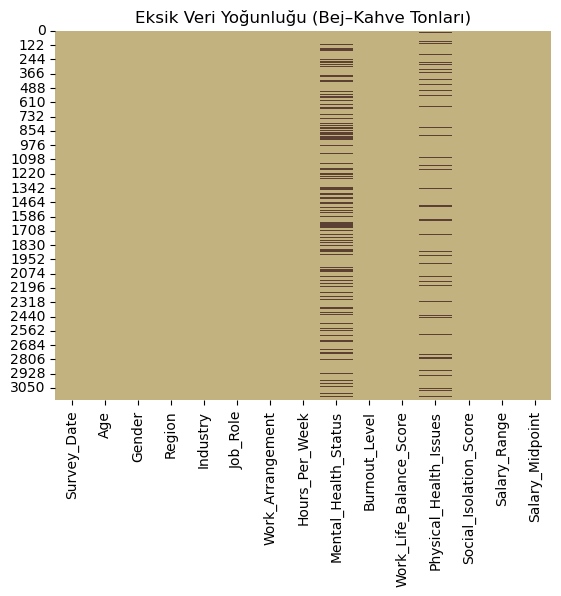

In [96]:
sns.heatmap(df.isnull(), 
            cmap=sns.color_palette(["#C2B280", "#5C4033"]), 
            cbar=False)
plt.title("Eksik Veri Yoğunluğu (Bej–Kahve Tonları)")
plt.show()

###  Doldurma veya silme stratejisi belirle. 3. Eksik değerleri silmek mi doldurmak mı daha uygun?

- 1. Mental_Health_Status (25%, 799 tane) ve Physical_Health_Issues(8%, 280 tane) columnlarda eksik veriler var.
     

- 2. 'Mental_Health_Status 25% lik durumu kisisel tercih gibi gozukuyor ama onlarda orta yaslarda 30-55 orta yaslarda yogunlasiyorlar.


- 3. Veri setinde eksik değerler yalnızca sağlık durumu ile ilgili sütunlarda gözlenmiştir.
Bu durumlarda veri kaybını önlemek amacıyla eksik değerler “Not Disclosed” olarak doldurulmuştur.
Böylece hem örneklem bütünlüğü korunmuş hem de yanıt vermemeyi temsil eden anlamlı bir kategori oluşturulmuştur.


-   Ayrica Salary_Range mean.() ile float'a donusturerek, Ortalama, min, max, st, ve korelasyon analizi yapilabilir hale geldi. 


In [97]:
df[df['Mental_Health_Status'].isnull()]['Region'].value_counts()

Region
Oceania          146
South America    145
Europe           143
North America    134
Africa           117
Asia             114
Name: count, dtype: int64

In [98]:
df[df['Mental_Health_Status'].isnull()]['Age'].describe()
# Yaslari Ortalama yas 43.5
# cogu 30-55 yasinda
# en genc 22 en yasli 65
# yani eksik yanit verenlerin cogusu orta yasli insanlar
# deneyimli calisanlar icin hassas konu olabilir belki kisisel bilgi paylasmak mental health alaninda
# Bunu ileride yas gruplarina gore mental health paylasma egilimi gibi bir analiz icin kullanabilirz.

count    799.000000
mean      43.488110
std       12.768207
min       22.000000
25%       32.000000
50%       44.000000
75%       55.000000
max       65.000000
Name: Age, dtype: float64

In [99]:
df[df['Physical_Health_Issues'].isnull()]['Age'].describe()
# Mental Health Sorusunu(799) bos birakanlarla neredeyse ayni sonuclari verdi. 
# Yaslari Ortalama yas 43.5
# cogu 30-55 yasinda
# en genc 22 en yasli 65
# yani eksik yanit verenlerin cogusu orta yasli insanlar
# deneyimli calisanlar icin hassas konu olabilir belki kisisel bilgi paylasmak genel saglik durumuyla ilgili


count    280.000000
mean      44.060714
std       12.931023
min       22.000000
25%       33.750000
50%       44.000000
75%       55.000000
max       65.000000
Name: Age, dtype: float64

In [100]:
df[df['Physical_Health_Issues'].isnull()]['Region'].value_counts()
# eksik veri en cok South America ve Oceania
# 54 kisi(south America), Oceania(51)  yani bu bolgelerdeki insanlar ve deneyimli calisanlar icin ozelve kisisel onu olabilir bunu konusmak

Region
South America    54
Oceania          51
Africa           48
Asia             45
Europe           41
North America    41
Name: count, dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Survey_Date              3157 non-null   datetime64[ns]
 1   Age                      3157 non-null   int64         
 2   Gender                   3157 non-null   object        
 3   Region                   3157 non-null   object        
 4   Industry                 3157 non-null   object        
 5   Job_Role                 3157 non-null   object        
 6   Work_Arrangement         3157 non-null   object        
 7   Hours_Per_Week           3157 non-null   int64         
 8   Mental_Health_Status     2358 non-null   object        
 9   Burnout_Level            3157 non-null   object        
 10  Work_Life_Balance_Score  3157 non-null   int64         
 11  Physical_Health_Issues   2877 non-null   object        
 12  Social_Isolation_Score   3157 non-

- ### Doldurma Islemi.

In [102]:
df['Mental_Health_Status'] = (
    df['Mental_Health_Status']
    .replace(['',' ', 'None', 'nan', 'NaN'], np.nan)
    .fillna('Not Disclosed')
)

In [103]:
df['Physical_Health_Issues'] = (
    df['Physical_Health_Issues']
    .replace(['', ' ', 'None', 'nan', 'NaN'], np.nan)
    .fillna('Not Disclosed') 
)
# Once NaN yapip, sonra dolduruyoruz fillna

In [104]:
df.isnull().sum()
# Eksik verileri bu sekilde duzenledik

Survey_Date                0
Age                        0
Gender                     0
Region                     0
Industry                   0
Job_Role                   0
Work_Arrangement           0
Hours_Per_Week             0
Mental_Health_Status       0
Burnout_Level              0
Work_Life_Balance_Score    0
Physical_Health_Issues     0
Social_Isolation_Score     0
Salary_Range               0
Salary_Midpoint            0
dtype: int64

### 🚨 4. Aykırı Değerlerle (Outliers) Mücadele

**Adımlar:**
- Sayısal değişkenlerde aykırı değerleri IQR veya z-score yöntemiyle tespit et.
- Boxplot veya scatterplot ile görselleştir.
- Uygun yöntemle bu değerleri düşür, sınırlılaştır veya dönüştür.

In [105]:
df['Age'].describe() 

count    3157.000000
mean       43.732024
std        12.661095
min        22.000000
25%        33.000000
50%        44.000000
75%        55.000000
max        65.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

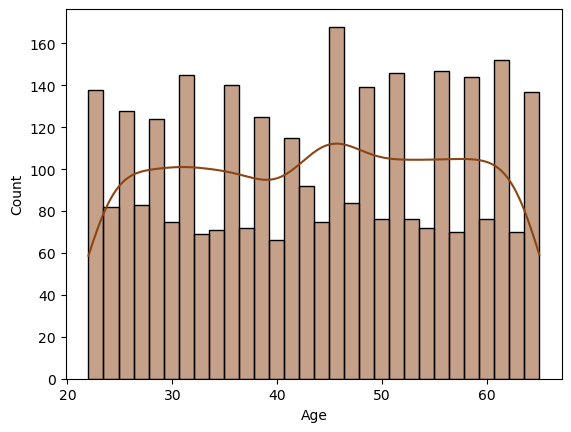

In [106]:
sns.histplot(df['Age'], color="saddlebrown", bins = 30, kde = True)
# Histogram dagilimi gormek icin

In [107]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
# q1 ve q3 araligi verinin 50% araligini gosterir

In [108]:
len(outliers)
# IQR yöntemine göre hiçbir uç değer olmadığını,

# Tüm yaşların “normal dağılım aralığı” içinde kaldığını gösterir.


0

In [109]:
print("Q1:", Q1)
print("Q3:", Q3)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
#Yaşların %25’i 33 yaşın altında, Yaşların %75’i 55 yaşın altında, Tipik yaş aralığı: 33–55
# 0 yaşın altı yok (mantıklı sınır)

Q1: 33.0
Q3: 55.0
Lower bound: 0.0
Upper bound: 88.0


<Axes: xlabel='Hours_Per_Week', ylabel='Count'>

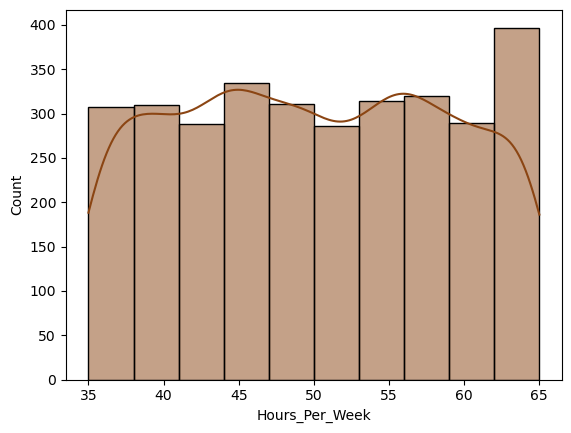

In [110]:
sns.histplot(df['Hours_Per_Week'],color="saddlebrown", bins = 10, kde = True)

In [111]:
df['Hours_Per_Week'].describe()

count    3157.000000
mean       49.904973
std         8.897699
min        35.000000
25%        42.000000
50%        50.000000
75%        57.000000
max        65.000000
Name: Hours_Per_Week, dtype: float64

In [112]:
Q1_hours = df['Hours_Per_Week'].quantile(0.25)
Q3_hours = df['Hours_Per_Week'].quantile(0.75)
IQR_hours = Q3_hours - Q1_hours

lower_bound_hours = Q1_hours - 1.5 * IQR_hours
upper_bound_hours =Q3_hours + 1.5 * IQR_hours

outliers_hours = df[(df['Hours_Per_Week'] < lower_bound_hours )| (df['Hours_Per_Week'] > upper_bound_hours)]

In [113]:
len(outliers_hours)
# Hours_per_week dagilimi cok genis

0

In [114]:
print("Q1:", Q1_hours)
print("Q3:", Q3_hours)
print("Lower bound:", lower_bound_hours)
print("Upper bound:", upper_bound_hours)

Q1: 42.0
Q3: 57.0
Lower bound: 19.5
Upper bound: 79.5


In [115]:
df.sort_values(by = 'Hours_Per_Week', ascending =False ).head(10)
# en cok calisma saati 65, ortalama 50

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range,Salary_Midpoint
1511,2025-06-13,23,Female,Asia,Manufacturing,Sales Representative,Onsite,65,Not Disclosed,Low,4,Back Pain; Shoulder Pain; Neck Pain; Wrist Pain,1,$120K+,120000.0
1280,2025-06-11,52,Male,North America,Technology,Research Scientist,Remote,65,Anxiety,High,3,Shoulder Pain,3,$60K-80K,70000.0
2407,2025-06-20,50,Male,Oceania,Customer Service,Financial Analyst,Hybrid,65,Stress Disorder,High,2,Back Pain,2,$40K-60K,50000.0
2755,2025-06-23,50,Female,South America,Technology,Data Analyst,Remote,65,Not Disclosed,High,3,Not Disclosed,3,$80K-100K,90000.0
2398,2025-06-20,61,Male,South America,Manufacturing,Digital Marketing Specialist,Remote,65,Stress Disorder,Medium,2,Back Pain; Shoulder Pain; Eye Strain,4,$60K-80K,70000.0
478,2025-06-05,57,Male,South America,Technology,IT Support,Hybrid,65,Stress Disorder,Medium,1,Back Pain; Eye Strain; Neck Pain,2,$40K-60K,50000.0
2370,2025-06-20,43,Male,Europe,Professional Services,Data Analyst,Onsite,65,Burnout,Low,5,Neck Pain,1,$60K-80K,70000.0
1813,2025-06-16,50,Female,Oceania,Technology,Software Engineer,Onsite,65,PTSD,Medium,3,Back Pain,4,$100K-120K,110000.0
97,2025-06-01,22,Female,South America,Professional Services,Research Scientist,Remote,65,Burnout,High,5,Shoulder Pain; Eye Strain,3,$100K-120K,110000.0
350,2025-06-04,65,Female,Asia,Professional Services,Quality Assurance,Onsite,65,Stress Disorder,Low,1,Neck Pain; Wrist Pain,3,$100K-120K,110000.0


In [116]:
print('Q1:', Q1_hours)
print('Q3:', Q3_hours)
print('IQR:', IQR_hours)
print('Lower bound of outlier:', lower_bound_hours)
print('Upper bound of outlier:', upper_bound_hours)

Q1: 42.0
Q3: 57.0
IQR: 15.0
Lower bound of outlier: 19.5
Upper bound of outlier: 79.5


<Axes: xlabel='Hours_Per_Week'>

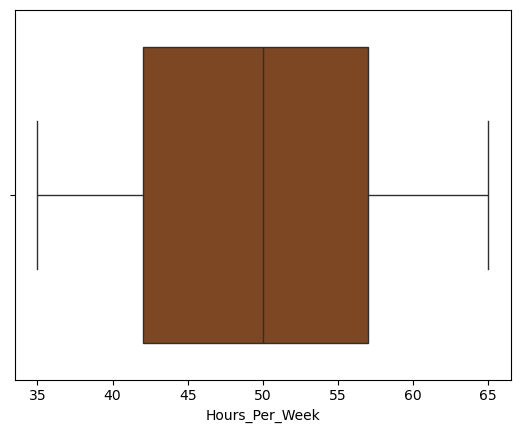

In [117]:
#- Boxplot veya scatterplot ile görselleştir.
sns.boxplot(x=df['Hours_Per_Week'], color="saddlebrown")

In [118]:
df['Salary_Midpoint'].describe()
#Ortalama maas 82000

count      3157.000000
mean      82017.738359
std       21009.435736
min       50000.000000
25%       70000.000000
50%       90000.000000
75%       90000.000000
max      120000.000000
Name: Salary_Midpoint, dtype: float64

In [119]:
df['Salary_Midpoint'].isnull().sum()

0

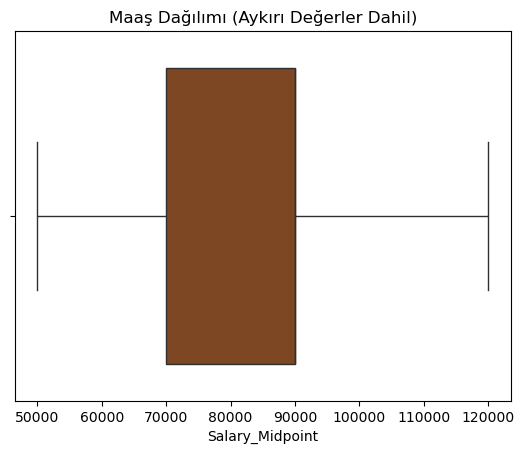

In [120]:
sns.boxplot(x=df['Salary_Midpoint'], color="saddlebrown")
plt.title("Maaş Dağılımı (Aykırı Değerler Dahil)")
plt.show()

In [121]:
Q1_Salary = df['Salary_Midpoint'].quantile(0.25)
Q3_Salary = df['Salary_Midpoint'].quantile(0.75)
IQR_Salary = Q3_Salary - Q1_Salary

lower_bound_Salary = Q1_Salary - 1.5 * IQR_Salary
upper_bound_Salary = Q3_Salary + 1.5 * IQR_Salary

print("Lower bound:", lower_bound_Salary)
print("Upper bound:", upper_bound_Salary)
# yani 40K alti ve 120K ustu outlier kabul edilir.

Lower bound: 40000.0
Upper bound: 120000.0


In [122]:
outliers_Salary = df[df['Salary_Midpoint'] > upper_bound_Salary]
print("Aykırı maaş sayısı:", len(outliers_Salary))

Aykırı maaş sayısı: 0


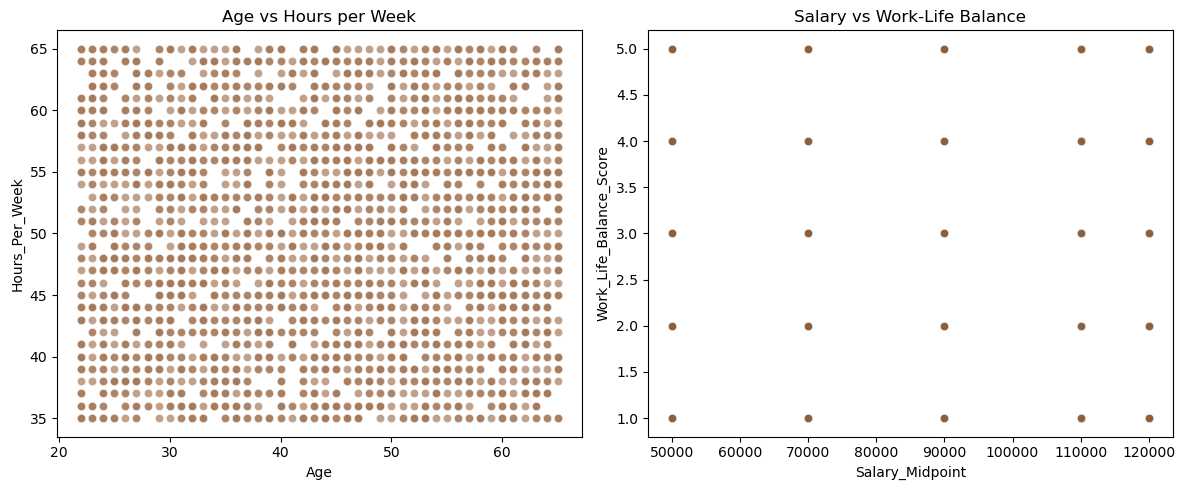

In [123]:
# Scatter plot 
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='Age', y='Hours_Per_Week', data=df, color="#A67B5B", alpha=0.7)
plt.title("Age vs Hours per Week")

plt.subplot(1,2,2)
sns.scatterplot(x='Salary_Midpoint', y='Work_Life_Balance_Score', data=df, color="#8B5E3C", alpha=0.7)
plt.title("Salary vs Work-Life Balance")

plt.tight_layout()
plt.show()


**Sorular:**
1. Hangi değişkenlerde aykırı değerler yoğun?

Veri setinde haftalık çalışma süresi ortalama 50 saattir.
En yüksek değer olan 65 saat, bu ortalamanın üzerinde olsa da, IQR yöntemiyle belirlenen üst sınır (79.5 saat) içinde kaldığı için istatistiksel olarak outlier değildir.
Ancak 65 saat, gerçek dünyada uzun bir çalışma süresini temsil ettiği için “doğal” veya “mantıksal outlier” olarak değerlendirilebilir.
Bu değer, özellikle yöneticiler, girişimciler veya bilişim sektöründeki çalışanlar için makul bir düzeyde görülebilir ve analizden çıkarılmamalıdır.

2. Bu aykırılıklar doğal mı yoksa hatalı mı?

Dogal veya Mantiksal Outlier.

4. Aykırı değerleri nasıl ele almak analiz sonuçlarını etkiler?
5. Aykırı değerler, analiz sonuçlarını doğrudan etkileyen kritik gözlemlerdir.
Hatalı ölçüm kaynaklı outlier’lar ortalamayı ve korelasyonu bozabileceği için temizlenmelidir.
Ancak 65 saat gibi mantıksal outlier’lar, verinin gerçek dağılımını yansıttığından korunmalıdır.
Bu analizde istatistiksel olarak uç olmayan ancak üst sınırda yer alan değerler “doğal outlier” olarak değerlendirilmiş ve veri bütünlüğü korunmuştur.

### 🔍 5. Keşifsel Veri Analizi (EDA)

**Adımlar:**
- Temel istatistikleri özetle.
- Kategorik değişkenler için frekans tabloları oluştur.
- Korelasyon analizi yap.
- Gruplar arası karşılaştırmalar yap.

In [124]:
df.describe()
# Age, hours_per week sutunun std daha yuksek
# Ortalama ile medyan en cok Age sutununda farkli, sayi olarak arasi uzak


,Survey_Date,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score,Salary_Midpoint
count,3157,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000
mean,2025-06-13 13:29:37.763699712,43.732024,49.904973,2.996516,2.704783,82017.738359
min,2025-06-01 00:00:00,22.000000,35.000000,1.000000,1.000000,50000.000000
25%,2025-06-07 00:00:00,33.000000,42.000000,2.000000,2.000000,70000.000000
50%,2025-06-14 00:00:00,44.000000,50.000000,3.000000,3.000000,90000.000000
75%,2025-06-20 00:00:00,55.000000,57.000000,4.000000,4.000000,90000.000000
max,2025-06-26 00:00:00,65.000000,65.000000,5.000000,5.000000,120000.000000
std,NaN,12.661095,8.897699,1.163307,1.188887,21009.435736


### - Kategorik değişkenler için frekans tabloları .

In [125]:
df['Work_Arrangement'].value_counts()
#isyerinde calisanlar daha cok, remote daha az.

Work_Arrangement
Onsite    1562
Hybrid    1007
Remote     588
Name: count, dtype: int64

In [126]:
#her kategorik degiskende kac cevap tekrarlamis
df['Region'].value_counts()

Region
South America    575
Africa           532
Oceania          523
Asia             517
Europe           513
North America    497
Name: count, dtype: int64

In [127]:
df['Gender'].value_counts()
#Male ve Female nerdeyse ayni oranda

Gender
Male                 1535
Female               1500
Non-binary             90
Prefer not to say      32
Name: count, dtype: int64

In [128]:
df['Industry'].value_counts(normalize = True)* 100


Industry
Professional Services    23.123218
Technology               18.783655
Manufacturing            11.719987
Finance                  11.624960
Education                 9.090909
Healthcare                7.823883
Marketing                 6.398480
Retail                    5.955021
Customer Service          5.479886
Name: proportion, dtype: float64

In [129]:
df['Mental_Health_Status'].value_counts()

Mental_Health_Status
Not Disclosed      799
PTSD               423
Anxiety            394
Burnout            392
Depression         386
ADHD               385
Stress Disorder    378
Name: count, dtype: int64

In [130]:
df['Social_Isolation_Score'].value_counts()

Social_Isolation_Score
3    929
2    856
1    571
4    536
5    265
Name: count, dtype: int64

In [131]:
cat_cols = ['Gender', 'Region', 'Industry', 'Job_Role', 
            'Work_Arrangement', 'Mental_Health_Status', 
            'Physical_Health_Issues']

In [132]:
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False))
    print("\nYüzdeler:")
    print(df[col].value_counts(normalize=True, dropna=False) * 100)


--- Gender ---
Gender
Male                 1535
Female               1500
Non-binary             90
Prefer not to say      32
Name: count, dtype: int64

Yüzdeler:
Gender
Male                 48.622110
Female               47.513462
Non-binary            2.850808
Prefer not to say     1.013621
Name: proportion, dtype: float64

--- Region ---
Region
South America    575
Africa           532
Oceania          523
Asia             517
Europe           513
North America    497
Name: count, dtype: int64

Yüzdeler:
Region
South America    18.213494
Africa           16.851441
Oceania          16.566360
Asia             16.376307
Europe           16.249604
North America    15.742794
Name: proportion, dtype: float64

--- Industry ---
Industry
Professional Services    730
Technology               593
Manufacturing            370
Finance                  367
Education                287
Healthcare               247
Marketing                202
Retail                   188
Customer Service         

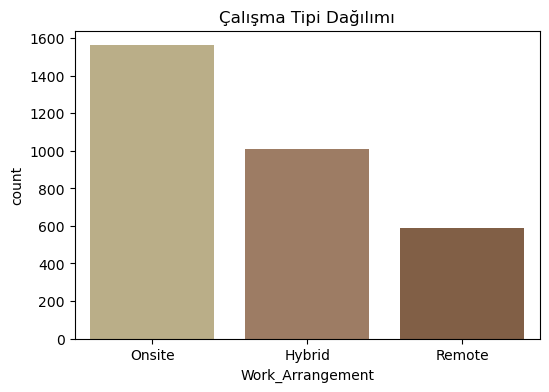

In [133]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Work_Arrangement', hue = 'Work_Arrangement', palette=['#C2B280', '#A67B5B', '#8B5E3C'],legend=False)
plt.title("Çalışma Tipi Dağılımı")
plt.show()

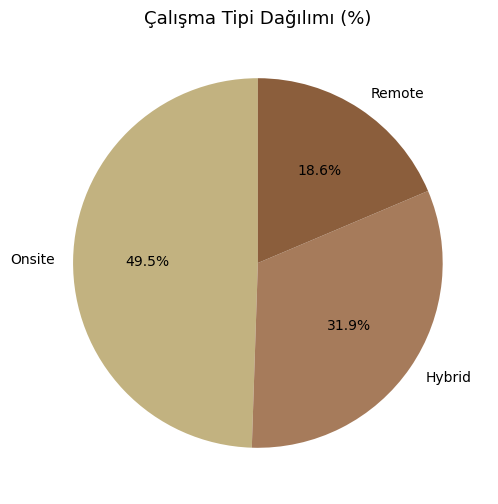

In [134]:
work_counts = df['Work_Arrangement'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(work_counts,
        labels=work_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#C2B280', '#A67B5B', '#8B5E3C'])

plt.title('Çalışma Tipi Dağılımı (%)', fontsize=13)
plt.show()

### Korelasyon analizi,
1. Hangi değişkenler arasında güçlü bir korelasyon var?


In [135]:
#Sayisal sutunlari arasindaki iliski icin 
corr = df.corr(numeric_only=True)
corr
# %0–25 → Zayıf ilişki

# %25–75 → Orta düzey ilişki

# %75–100 → Güçlü ilişki

# İşaret (+ / −) sadece ilişkinin yönünü gösterir, gücünü etkilemez.

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score,Salary_Midpoint
Age,1.000000,0.003748,-0.022523,-0.003005,0.023665
Hours_Per_Week,0.003748,1.000000,-0.014879,-0.003941,0.032824
Work_Life_Balance_Score,-0.022523,-0.014879,1.000000,-0.004639,0.009752
Social_Isolation_Score,-0.003005,-0.003941,-0.004639,1.000000,0.003305
Salary_Midpoint,0.023665,0.032824,0.009752,0.003305,1.000000


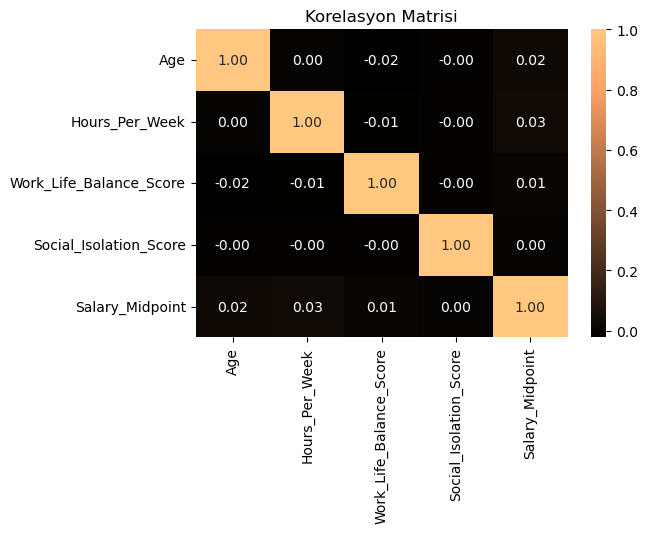

In [136]:
plt.figure(figsize= (6,4))
sns.heatmap(corr, annot=True, cmap='copper', fmt = '.2f')
plt.title('Korelasyon Matrisi')
plt.show()
# korelasyon yok gibi

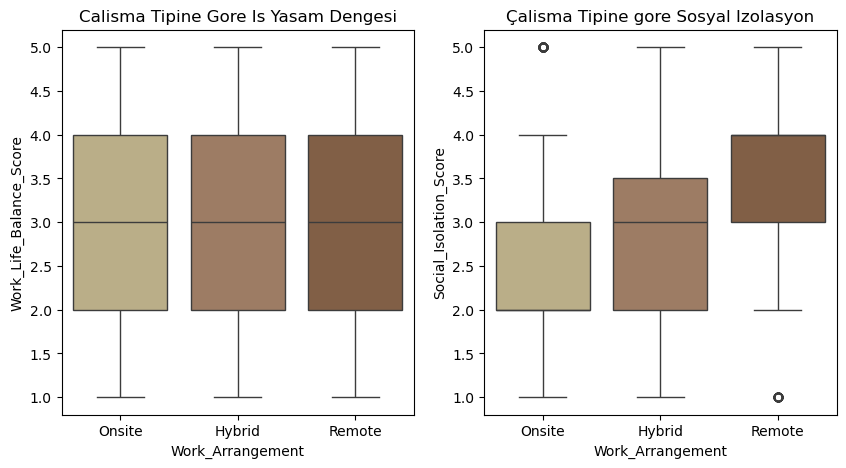

In [137]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='Work_Arrangement', y = 'Work_Life_Balance_Score', hue='Work_Arrangement', data = df, palette=['#C2B280', '#A67B5B', '#8B5E3C'])
plt.title('Calisma Tipine Gore Is Yasam Dengesi')

plt.subplot(1,2,2)
sns.boxplot(x='Work_Arrangement', y='Social_Isolation_Score',hue='Work_Arrangement', data=df, palette=['#C2B280', '#A67B5B', '#8B5E3C'])
plt.title("Çalisma Tipine gore Sosyal Izolasyon")

plt.tight_layout
plt.show()

- Veri, uzaktan çalışmanın sosyal izolasyonu artırdığını;
- iş-yaşam dengesi üzerinde anlamlı bir iyileşme sağlamadığını göstermektedir.

#### 2. Uzaktan çalışma süresi sağlık göstergelerini nasıl etkiliyor?

In [138]:
df.groupby('Work_Arrangement')['Work_Life_Balance_Score'].mean()
# Çalışma biçimine göre iş–yaşam dengesi incelendiğinde, ofiste çalışanların ortalama skorları az da olsa daha yüksek bulunmuştur.

Work_Arrangement
Hybrid    2.948361
Onsite    3.028809
Remote    2.993197
Name: Work_Life_Balance_Score, dtype: float64

In [139]:
df.groupby('Work_Arrangement')[['Work_Life_Balance_Score', 'Social_Isolation_Score']].mean()
# Çalışma biçimine göre yapılan analizde, uzaktan çalışanların sosyal izolasyon skorları belirgin şekilde yüksek bulunmuştur.
# Buna karşın, ofiste çalışanların iş–yaşam dengesi biraz daha iyi görünmektedir.

,Work_Life_Balance_Score,Social_Isolation_Score
Work_Arrangement,,
Hybrid,2.948361,2.745780
Onsite,3.028809,2.380282
Remote,2.993197,3.496599


In [140]:
df[['Work_Arrangement', 'Mental_Health_Status']].value_counts().head(10)
# en cok PTSD, BURNOUT, DEPRESSION, STRESS DISORDER, VE HEPSI onsite da daha cok olmasi

Work_Arrangement  Mental_Health_Status
Onsite            Not Disclosed           368
Hybrid            Not Disclosed           268
Onsite            PTSD                    216
                  Burnout                 207
                  Depression              198
                  Anxiety                 197
                  Stress Disorder         190
                  ADHD                    186
Remote            Not Disclosed           163
Hybrid            PTSD                    129
Name: count, dtype: int64

In [141]:
df.groupby('Work_Arrangement')['Mental_Health_Status'].value_counts().groupby(level=0).head(5)


Work_Arrangement  Mental_Health_Status
Hybrid            Not Disclosed           268
                  PTSD                    129
                  ADHD                    128
                  Anxiety                 122
                  Burnout                 122
Onsite            Not Disclosed           368
                  PTSD                    216
                  Burnout                 207
                  Depression              198
                  Anxiety                 197
Remote            Not Disclosed           163
                  PTSD                     78
                  Anxiety                  75
                  ADHD                     71
                  Stress Disorder          71
Name: count, dtype: int64

- Sonuçlara göre PTSD, Burnout, Depression ve Stress Disorder gibi ruhsal sorunlar en çok ofiste çalışanlar arasında görülmektedir.
- Hibrit çalışanlarda bu durum orta düzeyde, uzaktan çalışanlarda ise daha düşük seviyededir.
- Ofis ortamının yüksek iş yükü ve sosyal stres faktörleriyle ilişkili olabileceğini, uzaktan çalışmanın ise ruhsal rahatlık sağlasa da sosyal izolasyonu artırdığını göstermektedir.

1️⃣ Onsite çalışanlarda ruhsal sorunlar belirgin şekilde daha fazla.

PTSD, Burnout, Depression, Anxiety ve Stress Disorder gibi durumlar
en çok ofiste (Onsite) çalışanlarda rapor edilmiş.

Bu, özellikle fiziksel ofis ortamında: iş baskısının, yönetsel stresin, sosyal veya hiyerarşik gerginliklerin daha fazla yaşandığını gösteriyor olabilir.


2️⃣ Hybrid çalışanlarda karışık tablo.

“PTSD” ve “Anxiety” gibi rahatsızlıklar belirgin, ama onsite kadar yoğun değil.

Hibrit çalışma, esneklik kazandırsa da tam istikrar sunmadığı için psikolojik açıdan “denge kurma zorluğu” yaratıyor olabilir.

3️⃣ Remote çalışanlarda daha az vaka.

“PTSD” ve “Burnout” uzaktan çalışanlarda daha az rapor edilmiş.

Bu, evden çalışanların iş yükünü kendi temposuna göre düzenleyebilmesiyle açıklanabilir.

Ancak unutma: Remote çalışanlarda sosyal izolasyon yüksekti (3.5 skoru),
yani “yalnız ama daha az tükenmiş” olabilirler.


In [142]:
df[['Physical_Health_Issues']].head(10)

,Physical_Health_Issues
0,Shoulder Pain; Neck Pain
1,Back Pain
2,Shoulder Pain; Eye Strain
3,Shoulder Pain; Eye Strain
4,Not Disclosed
5,Back Pain; Shoulder Pain
6,Back Pain; Shoulder Pain; Wrist Pain
7,Not Disclosed
8,Neck Pain
9,Back Pain


In [159]:
df['Physical_Health_Issues'] = df['Physical_Health_Issues'].str.split(';')
df_exploded = df.explode('Physical_Health_Issues')
df_exploded.groupby('Work_Arrangement')['Physical_Health_Issues'].value_counts().groupby(level=0).head(5)

Work_Arrangement  Physical_Health_Issues
Hybrid            Back Pain                 488
                   Eye Strain               378
                   Shoulder Pain            249
                  Shoulder Pain             248
                   Neck Pain                196
Onsite            Back Pain                 778
                   Eye Strain               600
                  Shoulder Pain             370
                   Shoulder Pain            366
                   Neck Pain                342
Remote            Back Pain                 297
                   Eye Strain               225
                   Neck Pain                145
                   Shoulder Pain            143
                  Shoulder Pain             131
Name: count, dtype: int64

1️⃣ Onsite çalışanlarda fiziksel yıpranma en yüksek

En sık görülen rahatsızlıklar: bel ağrısı, göz yorgunluğu, omuz ağrısı

Ofis ortamında sabit pozisyonda uzun süre oturma, ergonomik olmayan masa–sandalye düzeni
ve ekran başında geçirilen süre bunların başlıca sebepleri olabilir.

Ayrıca işe gidip gelme yorgunluğu da fiziksel yükü artırıyor.


2️⃣ Hybrid çalışanlar orta düzeyde etkilenmiş

Hem ofiste hem evde çalışmanın karışımı olduğu için bazı günler ergonomi iyi, bazı günler kötü olabilir.

“Back Pain” ve “Eye Strain” yine sık ama onsite kadar yüksek değil.

3️⃣ Remote çalışanlarda fiziksel sorunlar daha az

Evden çalışanlar daha az hareket ediyor ama genelde kendi konfor alanlarında çalışıyorlar.

Uzun süre ekran başında olsalar da, ofis stresinin azalması fiziksel yıpranmayı azaltıyor.

Ancak uzun vadede hareketsizlik başka riskler doğurabilir.

3. Hangi yaş grubu en yüksek stres seviyesine sahip?

In [160]:
df['is_stressed']= df['Mental_Health_Status'].apply(lambda x:1 if 'Stress' in str(x)else 0 )

In [161]:
age_groups =  pd.cut(df['Age'], bins = [18,25,35,45,55,65],
                     labels =['18-25', '26-35', '36-45', '46-55', '56-65'])

In [162]:
stress_by_age =  df.groupby(age_groups, observed=False)['is_stressed'].mean()*100
print(stress_by_age)

Age
18-25    11.428571
26-35    10.285714
36-45    12.253521
46-55    13.013699
56-65    12.483039
Name: is_stressed, dtype: float64


Fiziksel sağlık ofiste, ruhsal sağlık uzaktan calismada bozuluyor

ilk Gruplar 18-35 arasi dusuk.

36-65 arasi belirgin sekilde yuksek.

1️⃣ En yüksek stres seviyesi 46–55 yaş aralığında
İş sorumlulukları, aile yükümlülükleri ve ekonomik baskılar birleştiğinde stres seviyeleri artıyor.

2️⃣ En düşük stres 26–35 yaş grubunda
Bu grup genelde enerjisi yüksek, teknolojiye uyumlu,
ve uzaktan/hibrid çalışmaya daha rahat adapte olabilen.

3️⃣ Yaş arttıkça stres hafifçe azalıyor (56–65)
Emeklilik yaklaşan dönemde insanlar daha sakin.

18-25 is hayatina yeni baslayanlar, dusuk stresli

26-35 daha iyi yonetmeye egilimci stresi 

36-45 artis basliyor, is pozisyonlari ve sorumluluklarinin buyumesi, artmasi 

46-55 en yuksek stresli donem

56-55 stres biraz azaliyor 

**Sorular:**
1. Hangi değişkenler arasında güçlü bir korelasyon var?
   
   Sayısal değişkenler arasında güçlü bir korelasyon bulunmamaktadır. Bu durumda çalışma saatleri, yaş, iş-yaşam dengesi ve sosyal izolasyonun birbirini doğrudan etkilemediği; bu faktörlerin daha çok bireysel veya çevresel değişkenlerle ilişkili olabileceği söylenebilir.
   
2. Uzaktan çalışma süresi sağlık göstergelerini nasıl etkiliyor?

    Uzaktan çalışma, çalışanlara esneklik ve daha iyi fiziksel sağlık kazandırsa da, sosyal izolasyonu ve yalnızlık hissini artırmaktadır. Ofiste çalışanlarda ise fiziksel ve ruhsal yıpranma daha fazladır. Bu bulgular, “tam uzaktan” yerine “dengeli hibrit” modellerin çalışan sağlığı açısından daha sürdürülebilir olabileceğini göstermektedir.

   
   Veri analizine göre, uzaktan çalışanlarda Anxiety (kaygı) ve PTSD (travma sonrası stres) semptomları göre daha sık görülmektedir. Ayrıca bu grup, Social Isolation Score ortalamalarında da en yüksek değere sahiptir. Bu bulgular, uzaktan çalışma koşullarının ruhsal olarak daha fazla yalnızlık ve içe çekilme hissi yarattığını göstermektedir.

   
6. Hangi yaş grubu en yüksek stres seviyesine sahip?

    En yüksek stres seviyesi 46–55 yaş aralığında

### 📊 6. Veri Görselleştirme

**Adımlar:**
- Histogram, bar chart, scatter plot, pairplot, heatmap, line plot oluştur.
- Görselleştirmelerde sade ve anlamlı renk paletleri seç.

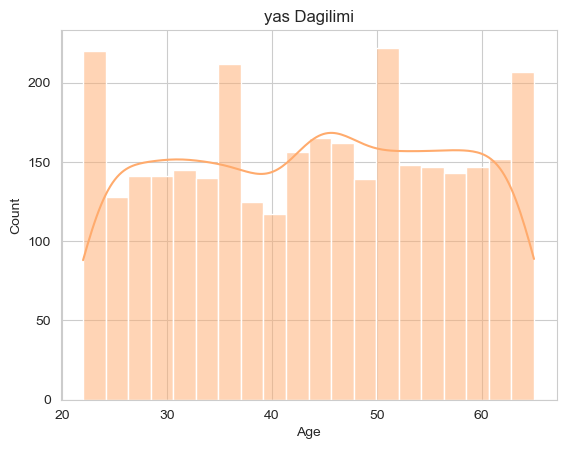

In [146]:
sns.set_style('whitegrid')
sns.set_palette('copper_r')
sns.histplot(df['Age'], bins = 20, kde = True)
plt.title('yas Dagilimi')
plt.show()

Text(0, 0.5, 'Stres Orani(%), Stress Level')

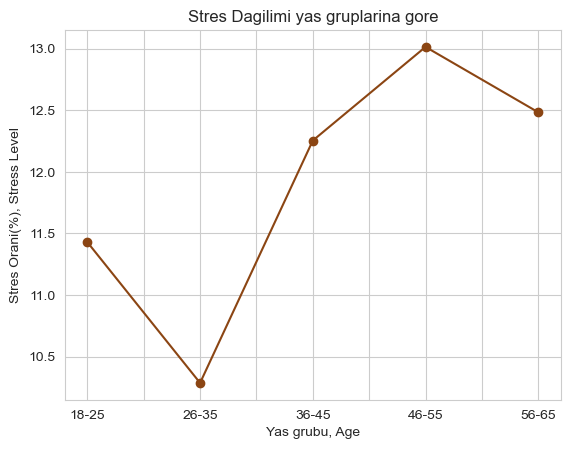

In [166]:
#1. Stres seviyesi dağılımı nasıldır?
stress_by_age.plot(kind = 'line', color = 'saddlebrown', marker = 'o')
plt.title('Stres Dagilimi yas gruplarina gore')
plt.xlabel('Yas grubu, Age')
plt.ylabel('Stres Orani(%), Stress Level')

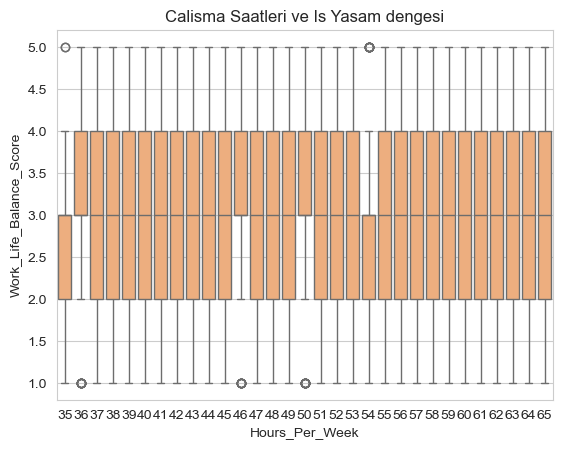

In [167]:
sns.boxplot(x='Hours_Per_Week', y='Work_Life_Balance_Score', data = df)
plt.title('Calisma Saatleri ve Is Yasam dengesi')
plt.show()

 ### 2. Uyku süresi ile üretkenlik arasında nasıl bir ilişki var ?

- Uyku suresi, work-life Balance Score'la iliskilendirerek
- Uretkenligi, Burnout Level ile iliskilendirebiliriz



In [168]:
#Burnout level bize kategorik formatta geldi bunu sayisala donusturmek icn
burnout_map = {'Low ':1, 'Medium':2, 'High':3}
df['Burnout_Level_Num'] = df['Burnout_Level'].map(burnout_map)

In [174]:
corr_sleep_productivity = df['Work_Life_Balance_Score'].corr(df['Burnout_Level_Num'])
print('Korelasyon', corr_sleep_productivity)

# Denge yuksek olsa insanlar tukenmislik yasayabilir veya tam tersi de

# Ikisi arasinda anlamli iliski yok

Korelasyon 0.007755769121767976


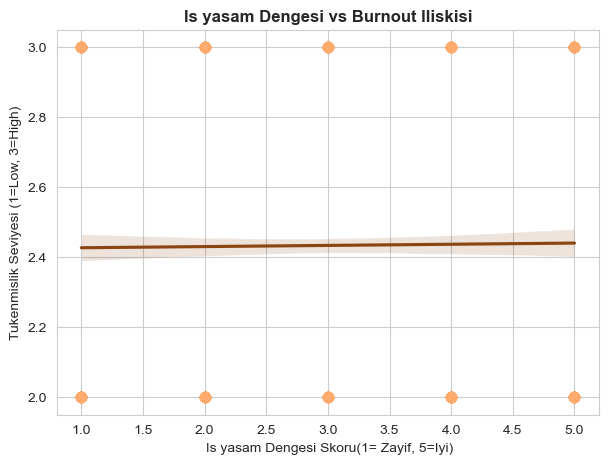

In [175]:
sns.set_style('whitegrid')
sns.set_palette('copper_r')

plt.figure(figsize=(7,5))
sns.regplot(
    data=df,
    x='Work_Life_Balance_Score',
    y='Burnout_Level_Num',
    scatter_kws={'alpha':0.6, 's':50},  
    line_kws={'color':'saddlebrown'}
)

plt.title('Is yasam Dengesi vs Burnout Iliskisi', fontsize =12, fontweight='bold')
plt.xlabel(' Is yasam Dengesi Skoru(1= Zayif, 5=Iyi)')
plt.ylabel('Tukenmislik Seviyesi (1=Low, 3=High)')
plt.show()
# Scatter plot ile sonuclarina gore, “denge arttıkça tükenmişlik azalıyor” gibi bir eğilim yok.

3. Cinsiyet veya yaş grubu bazında sağlık göstergeleri farklı mı?


Cinsiyete gore Saglik Gostergeleri

In [176]:
df.groupby('Gender')['Social_Isolation_Score'].mean()
# Erkekler ve Kadinlarin ortalamasi yakin bir puana sahip (Sosyal Izolasyon Skora gore). 

Gender
Female               2.681333
Male                 2.731596
Non-binary           2.611111
Prefer not to say    2.781250
Name: Social_Isolation_Score, dtype: float64

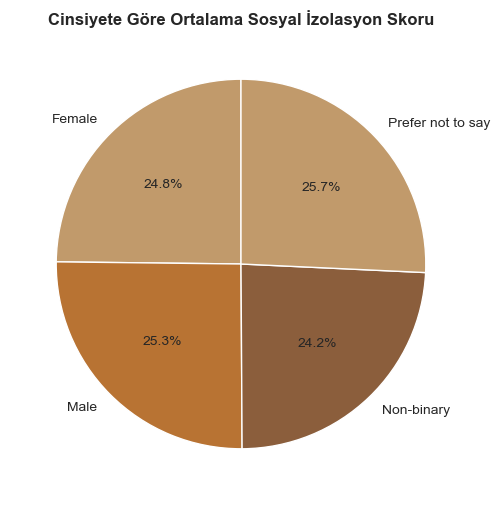

In [179]:

iso_by_gender = df.groupby('Gender')['Social_Isolation_Score'].mean()

colors = ['#C19A6B', '#B87333', '#8B5E3C']  
plt.figure(figsize=(6,6))
plt.pie(
    iso_by_gender,
    labels=iso_by_gender.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
)

plt.title('Cinsiyete Göre Ortalama Sosyal İzolasyon Skoru', fontsize=12, fontweight='bold')
plt.show()

In [188]:
df.groupby('Gender')['Work_Life_Balance_Score'].mean()

Gender
Female               3.016667
Male                 2.971336
Non-binary           3.144444
Prefer not to say    2.843750
Name: Work_Life_Balance_Score, dtype: float64

In [189]:
df.groupby('Gender')['Mental_Health_Status'].value_counts().groupby(level=0).head(3)
# Kadinlarda daha cok ADHD ve anksiyete one cikarken, erkeklerde  PTSD ve Depression one cikiyor

Gender             Mental_Health_Status
Female             Not Disclosed           364
                   ADHD                    199
                   Anxiety                 197
Male               Not Disclosed           398
                   PTSD                    213
                   Depression              199
Non-binary         Not Disclosed            26
                   Anxiety                  18
                   Burnout                  12
Prefer not to say  Not Disclosed            11
                   Burnout                   7
                   Depression                4
Name: count, dtype: int64

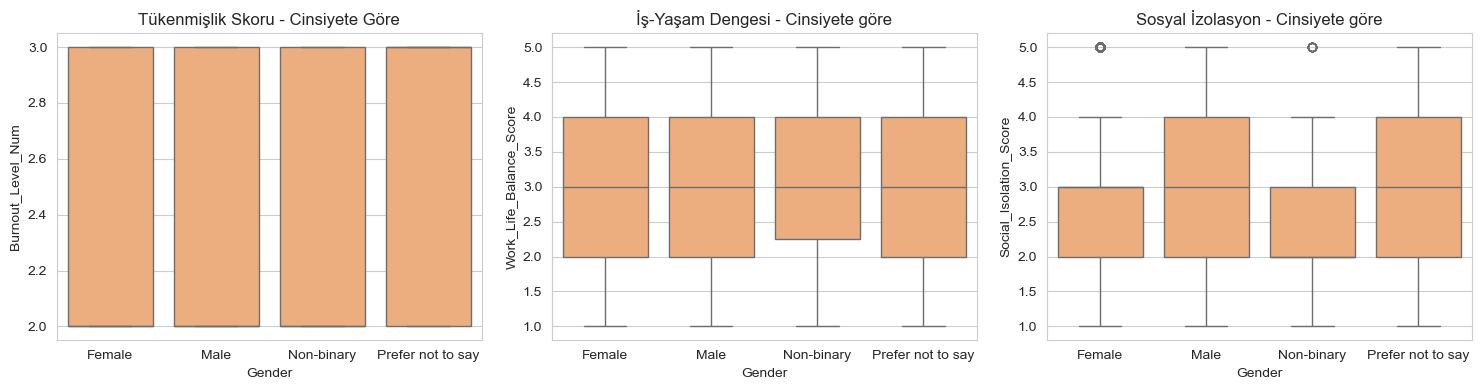

In [190]:
sns.set_palette('copper_r')
fig, axes = plt.subplots(1,3, figsize=(15,4))

sns.boxplot(data = df, x = 'Gender', y ='Burnout_Level_Num', ax = axes[0])
axes[0].set_title('Tükenmişlik Skoru - Cinsiyete Göre')

sns.boxplot(data = df, x= 'Gender', y = 'Work_Life_Balance_Score', ax = axes[1])
axes[1].set_title('İş-Yaşam Dengesi - Cinsiyete göre')

sns.boxplot(data=df, x = 'Gender', y = 'Social_Isolation_Score', ax  = axes[2])
axes[2].set_title('Sosyal İzolasyon - Cinsiyete göre')

plt.tight_layout()
plt.show()

In [191]:
#Yas grubuna Gore saglik gostergesi
age_groups
df.groupby(age_groups, observed=False)[['Burnout_Level_Num', 'Work_Life_Balance_Score','Social_Isolation_Score']].mean().round(2)

,Burnout_Level_Num,Work_Life_Balance_Score,Social_Isolation_Score
Age,,,
18-25,2.44,3.13,2.71
26-35,2.45,3.00,2.74
36-45,2.44,3.00,2.73
46-55,2.40,2.97,2.65
56-65,2.43,2.96,2.71


- Tukenmislik seviyeleri yakin. En yuksek 26-35 yas arasinda ortaya cikiyor.
- Is Yasam Dengesi, en yuksek oldugu yaslar 18-25, en dusuk oldugu 56-65 yaslar
- Sosyal Izolasyon skoru en yuksek 26-35 yas arasinda hissediyorlar, en dusukse 46-55 yaslarinda.

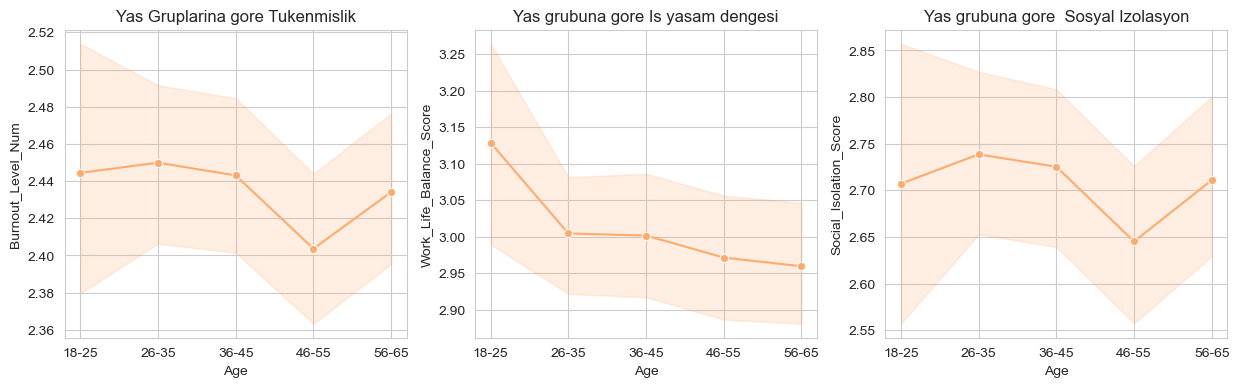

In [192]:
fig, axes = plt.subplots(1,3, figsize = (15,4))
sns.lineplot(x=age_groups, y = 'Burnout_Level_Num', data = df, marker = 'o', ax= axes[0])
axes[0].set_title('Yas Gruplarina gore Tukenmislik')

sns.lineplot(x=age_groups, y = 'Work_Life_Balance_Score', data = df, marker='o', ax = axes[1])
axes[1].set_title('Yas grubuna gore Is yasam dengesi')

sns.lineplot(x= age_groups, y='Social_Isolation_Score', data =df, marker ='o', ax= axes[2])
axes[2].set_title('Yas grubuna gore  Sosyal Izolasyon')

plt.tight_layout
plt.show()

**Sorular:**
1. Stres seviyesi dağılımı nasıldır?
2. Uyku süresi ile üretkenlik arasında nasıl bir ilişki var? # Yani denge yuksek olsa insalar tukenmislik yasayabilir veya tam tersi de. Yani ikisi arasinda anlamli iliski yok
3. Cinsiyet veya yaş grubu bazında sağlık göstergeleri farklı mı? Evet farkli.
- Erkekler ve Kadinlarin ortalamasi yakin bir puana sahip (Sosyal Izolasyon Skora gore).
- Kadinlarda daha cok ADHD ve anksiyete one cikarken, erkeklerde  PTSD ve Depression one cikiyor
- Tukenmislik seviyeleri yakin. En yuksek 26-35 yas arasinda ortaya cikiyor.
- Is Yasam Dengesi, en yuksek oldugu yaslar 18-25, en dusuk oldugu 56-65 yaslar
- Sosyal Izolasyon skoru en yuksek 26-35 yas arasinda hissediyorlar, en dusukse 46-55 yaslarinda.


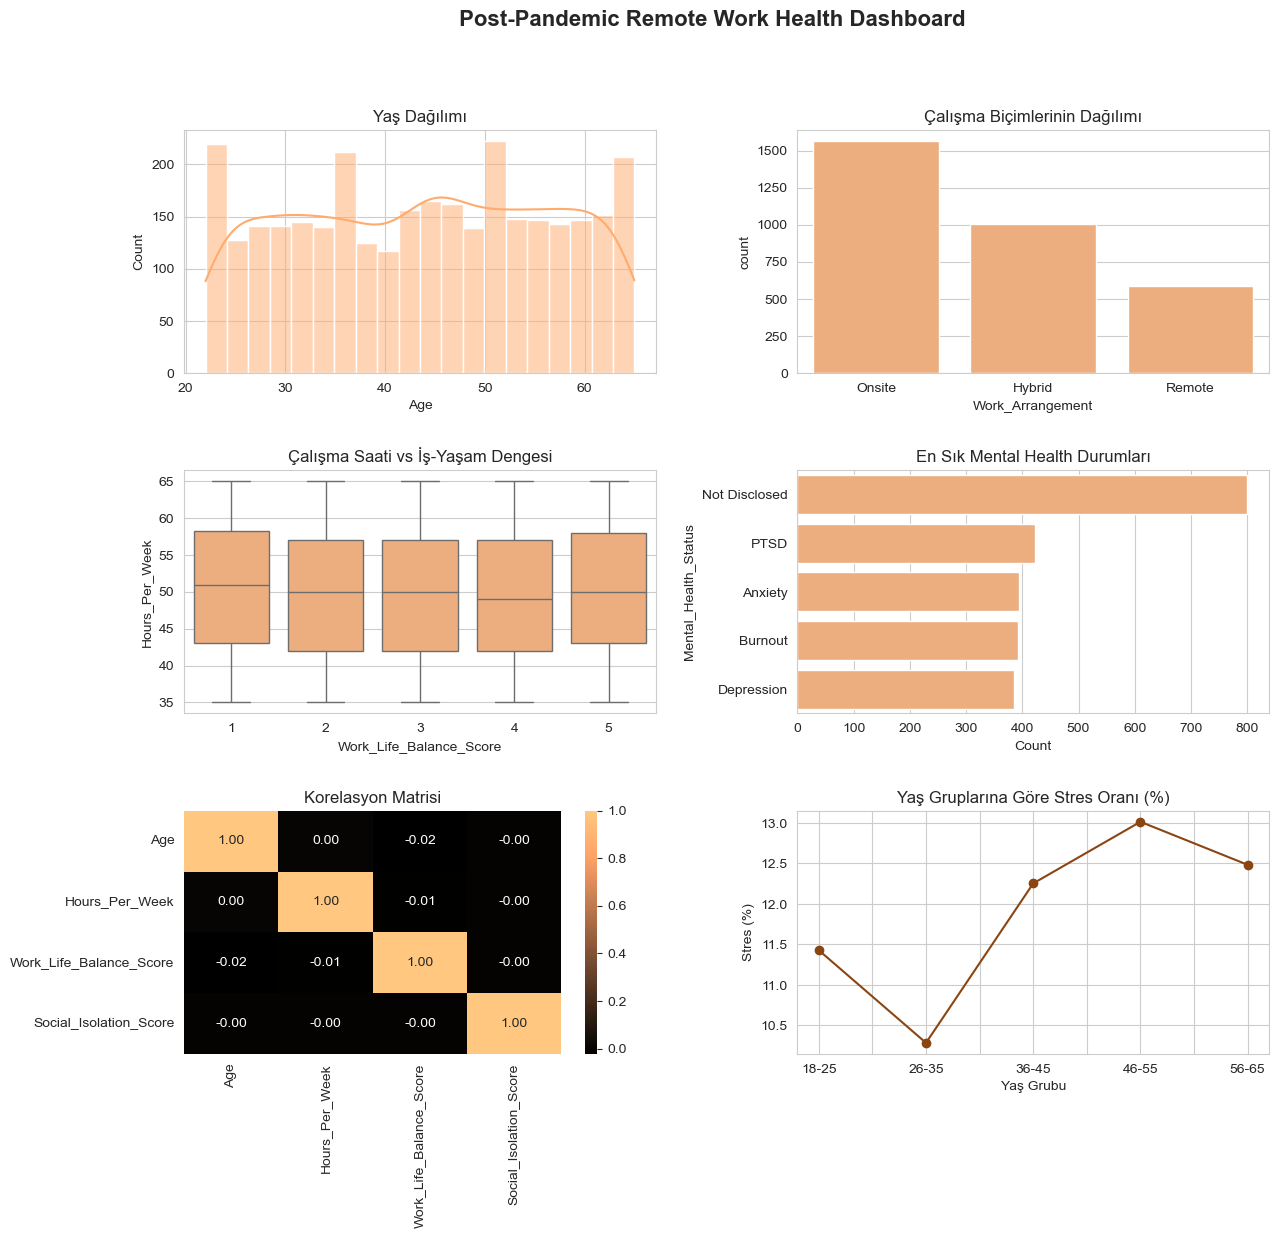

In [194]:

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1️⃣ Histogram – Yaş dağılımı
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0,0])
axes[0,0].set_title("Yaş Dağılımı")

# 2️⃣ Bar Chart – Çalışma Tipi Dağılımı
sns.countplot(x='Work_Arrangement', data=df, ax=axes[0,1])
axes[0,1].set_title("Çalışma Biçimlerinin Dağılımı")

# 3️⃣ Boxplot – Çalışma Saati vs Denge
sns.boxplot(x='Work_Life_Balance_Score', y='Hours_Per_Week', data=df, ax=axes[1,0])
axes[1,0].set_title("Çalışma Saati vs İş-Yaşam Dengesi")

# 4️⃣ Bar Chart – En sık Mental Health durumları
top_mh = df['Mental_Health_Status'].value_counts().head(5).reset_index()
top_mh.columns = ['Mental_Health_Status', 'Count']
sns.barplot(data=top_mh, x='Count', y='Mental_Health_Status', ax=axes[1,1])
axes[1,1].set_title("En Sık Mental Health Durumları")

# 5️⃣ Heatmap – Korelasyon matrisi
corr = df[['Age','Hours_Per_Week','Work_Life_Balance_Score','Social_Isolation_Score']].corr()
sns.heatmap(corr, annot=True, cmap='copper', fmt=".2f", ax=axes[2,0])
axes[2,0].set_title("Korelasyon Matrisi")

# 6️⃣ Line Plot – Yaş Gruplarına Göre Stres Oranı
stress_by_age.plot(kind='line', marker='o', color='saddlebrown', ax=axes[2,1])
axes[2,1].set_title("Yaş Gruplarına Göre Stres Oranı (%)")
axes[2,1].set_xlabel("Yaş Grubu")
axes[2,1].set_ylabel("Stres (%)")

plt.suptitle(" Post-Pandemic Remote Work Health Dashboard", fontsize=16, fontweight='bold')
plt.show()


### 🧩 7. Özet ve Yorum

**Adımlar:**
- Temizleme ve analiz sürecinde neler öğrendiğini özetle.
- Veri kalitesi hakkında çıkarım yap.
- Ek analizler öner.

### - Temizleme ve analiz sürecinde neler öğrendiğini özetle.

- Eksik veriler (NaN) analiz sonuçlarını doğrudan etkiler.
- Bu nedenle Mental_Health_Status ve Physical_Health_Issues sütunlarındaki eksik değerleri silmek yerine "Not Disclosed" etiketiyle doldurarak bilgi kaybı olmadan temizleme yapılabileceğini öğrendim.

- .isnull().sum() ile eksik veri yoğunluğunu bulmayı ve hangi değişkenlerin doldurulması gerektiğini belirlemeyi öğrendim.

- .fillna(), .dropna() ve .str.split() gibi pandas fonksiyonlarının veri hazırlama sürecinde ne kadar güçlü araçlar olduğunu deneyimledim.

- .explode() kullanarak bir hücrede birden fazla bilgi varsa bunları satırlara ayırmanın analiz için ne kadar gerekli olduğunu gördüm (örneğin: "Back Pain; Eye Strain")



### - Veri kalitesi hakkında çıkarım yap.

1. Missing Values - Mental_Health_Status (25%) ve Physical_Health_Issues (8%)
Eksik veriler silinmedi; etik bir şekilde "Not Disclosed" etiketiyle tamamlandı.
Eksik verilerin büyük kısmı “bilgi gizleme” kaynaklı — sistematik bir hata değil.
Dolayısıyla veri analiz için yeterince güvenilir
2. Consistency - Veri giris hatasi veya anormallik bulunmadi, veri temiz ve guvenilir 
3. Outliers - Hours_Per_Week'de 65 saat civari sinir degerler var ama IQR ile incelendiginde gercekci ama uc oldugu kirpma (capping) yontemiyle sinirlandirildi.
Aykirri deger az, dogal varvasyon gosteriyor 
4. Data types - Burnout_Level map() ile numeriklestirdim,
5. Completeness - cesitlilik yuksek, genellenebilir analizler sunuyor

###  Ek analizler öner.


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Professional Services'),
  Text(1, 0, 'Education'),
  Text(2, 0, 'Manufacturing'),
  Text(3, 0, 'Customer Service'),
  Text(4, 0, 'Technology'),
  Text(5, 0, 'Finance'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Healthcare'),
  Text(8, 0, 'Marketing')])

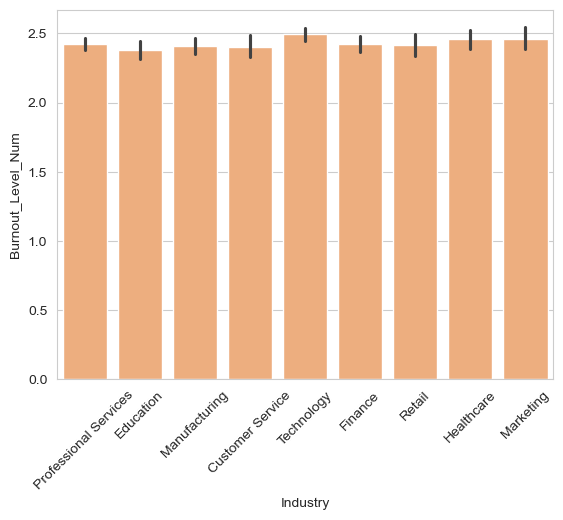

In [203]:
#  Sektör bazlı (Industry) analiz

# Amaç: Hangi sektör çalışanları daha fazla tükenmişlik veya izolasyon yaşıyor?

sns.barplot(x='Industry', y='Burnout_Level_Num', data=df)
plt.xticks(rotation=45)

<Axes: xlabel='Region', ylabel='Work_Life_Balance_Score'>

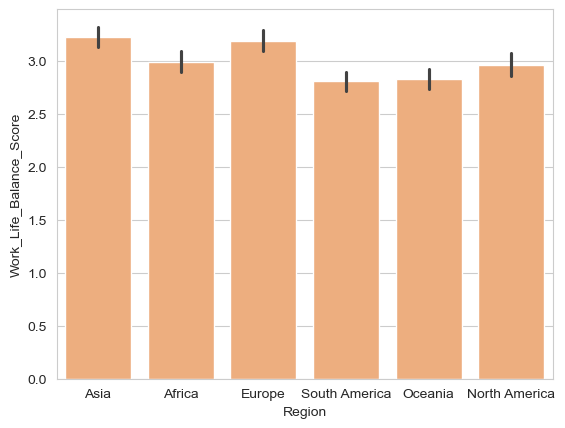

In [204]:
# Bölgesel karşılaştırma (Region bazında sağlık farkları)

# Amaç: Hangi bölgedeki çalışanlar daha dengeli veya daha izole?

sns.barplot(x='Region', y='Work_Life_Balance_Score', data=df)


**Sorular:**
1. Veri seti analiz için yeterince temiz hale geldi mi?
2. Daha fazla veri toplansa hangi özellikler anlamlı olurdu?
3. Analiz sonucunda hangi önlemler uzaktan çalışanların sağlığını iyileştirebilir?

### 1. Veri seti analiz için yeterince temiz hale geldi mi?
   Evet, veri seti EDA süreci sonunda analiz için yeterince temiz ve tutarlı hale gelmiştir. Eksik değer analizi:
isnull().sum() ile eksik veriler tespit edildi.
Özellikle Mental_Health_Status (%25) ve Physical_Health_Issues (%8) sütunlarında eksik veriler olduğu belirlendi.
Bu değerler veri kaybı yaşanmaması için "Not Disclosed" etiketiyle dolduruldu.

Veri tipi kontrolü:
Tüm değişkenlerin veri türleri (.info()) incelendi.

Survey_Date datetime’a dönüştürüldü.

Salary_Range metin formatından sayısal Salary_Midpoint sütununa çevrildi.
Böylece her değişken uygun formatta analiz edilebilir hale geldi.

Aykırı değer (outlier) analizi:
IQR yöntemiyle alt ve üst sınırlar hesaplandı.

Age ve Hours_Per_Week sütunlarında istatistiksel olarak birkaç uç değer bulundu ancak bunlar veri bağlamına uygun (doğal outlier) olduğu için veriden çıkarılmadı.

Kategorik sütunlarda çoklu değer temizliği:
Physical_Health_Issues gibi “;” ile ayrılmış çoklu yanıtlar split() + explode() yöntemiyle ayrıştırıldı.
Böylece frekans analizleri sağlıklı şekilde yapılabildi.

Genel kontrol:
Veri setinde artık NaN, tip uyuşmazlığı veya mantıksal tutarsızlık kalmadı.
Tüm sayısal sütunlar analiz yapılabilir formda, tüm kategorik sütunlar düzenli hale getirildi.


### 2. Daha fazla veri toplansa hangi özellikler anlamlı olurdu?

Uykuyla alakali veriler, Spor ve ya egzersiz aktivite, evden calisma ortaminin kalitesi

- Sleep_Quality_Score (1–5)
Uyku kalitesi (ör. sık uyanma, dinlenmiş hissetme durumu)

- Exercise_Frequency (gün/hafta)
Haftada kaç gün fiziksel egzersiz veya spor yaptığı

- Home_Distractions_Score (1–5)
Ev ortamındaki dikkat dağıtıcı unsurlar (gürültü, çocuk, TV vb.)

### 3. Analiz sonucunda hangi önlemler uzaktan çalışanların sağlığını iyileştirebilir?

Çalışma süresi 40–45 saatle sınırlandırılmalı, aşırı mesai önlenmelidir.

“Right to Disconnect” politikası uygulanarak mesai sonrası iletişim kısıtlanmalıdır.

Ergonomik çalışma ortamı desteği (masa, sandalye, monitör vb.) sağlanmalıdır.

Kısa egzersiz araları veya aktif mola uygulamaları teşvik edilmelidir.

Uyku süresi ve kalitesi iyileştirmeye yönelik farkındalık programları yapılmalıdır.

Psikolojik destek ve danışmanlık hizmetleri erişilebilir hale getirilmelidir.

Ekran yorgunluğunu azaltacak eğitimler (ör. 20-20-20 kuralı) düzenlenmelidir.

Sanal sosyal etkileşimler (ekip buluşmaları, kahve molaları) artırılmalıdır.

Mentorluk ve ekip eşleşme sistemleri sosyal bağları güçlendirmelidir.

Esnek veya hibrit çalışma modelleri çalışan tercihine göre uygulanmalıdır.

İş memnuniyeti, stres ve sağlık anketleri düzenli aralıklarla yapılmalıdır.

Spor, yoga ve meditasyon destekleri ile fiziksel–mental denge korunmalıdır.
